# Import Necessary Library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

# Reading the Data

In [2]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

**Attribute Information** 
**Age: age of the patient [years]**

**Sex: sex of the patient [M: Male, F: Female]**

**ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]**

**RestingBP: resting blood pressure [mm Hg]**

**Cholesterol: serum cholesterol [mm/dl]**

**FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]**

**RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]**

**MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]**

**ExerciseAngina: exercise-induced angina [Y: Yes, N: No]**

**Oldpeak: oldpeak = ST [Numeric value measured in depression]**

**ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]**

**HeartDisease: output class [1: heart disease, 0: Normal]**

# Expolre The Data

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**i found not null value in the data and data are complete**

In [9]:
df.duplicated().sum()

0

**i found not Duplicated value in the data and data are complete**

# Analysis and Visualization

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
sex = df['Sex'].value_counts().reset_index()
sex

,Sex,count
0,M,725
1,F,193


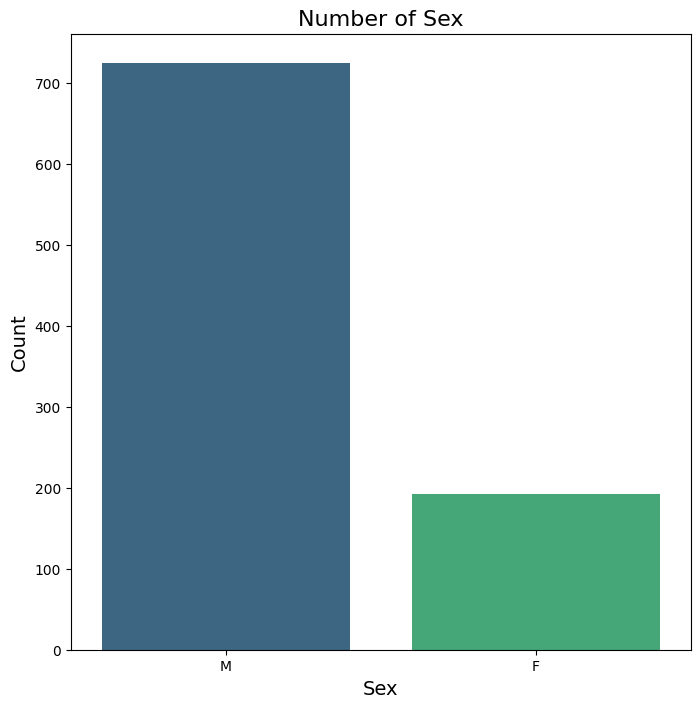

In [12]:
plt.figure(figsize=(8, 8))
sns.barplot(x='Sex', y='count', data=sex, palette='viridis')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of Sex', fontsize=16)
plt.show()

In [13]:
ChestPainType = df['ChestPainType'].value_counts().reset_index()
ChestPainType

,ChestPainType,count
0,ASY,496
1,NAP,203
2,ATA,173
3,TA,46


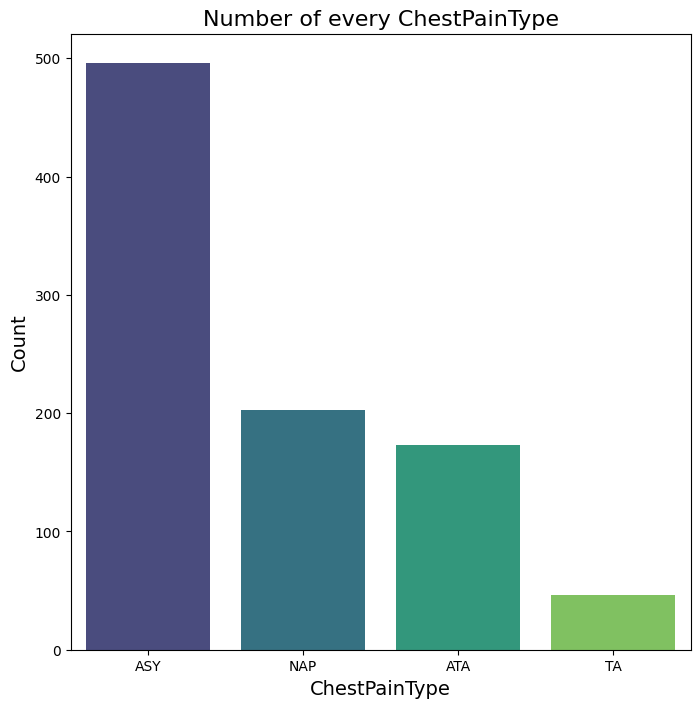

In [14]:
plt.figure(figsize=(8, 8))
sns.barplot(x='ChestPainType', y='count', data=ChestPainType, palette='viridis')
plt.xlabel('ChestPainType', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every ChestPainType', fontsize=16)
plt.show()

In [15]:
RestingECG = df['RestingECG'].value_counts().reset_index()
RestingECG

,RestingECG,count
0,Normal,552
1,LVH,188
2,ST,178


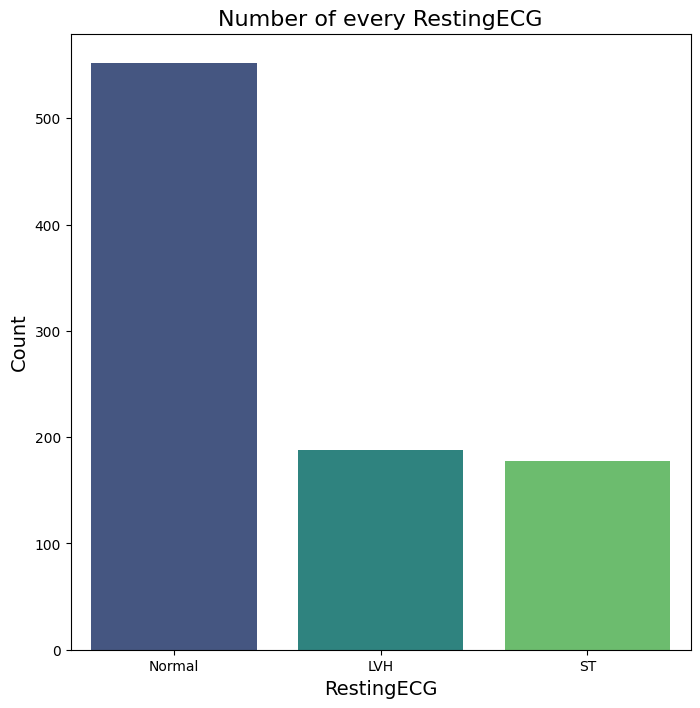

In [16]:
plt.figure(figsize=(8, 8))
sns.barplot(x='RestingECG', y='count', data=RestingECG, palette='viridis')
plt.xlabel('RestingECG', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of every RestingECG', fontsize=16)
plt.show()

In [17]:
ST_Slope = df['ST_Slope'].value_counts().reset_index()
ST_Slope

,ST_Slope,count
0,Flat,460
1,Up,395
2,Down,63


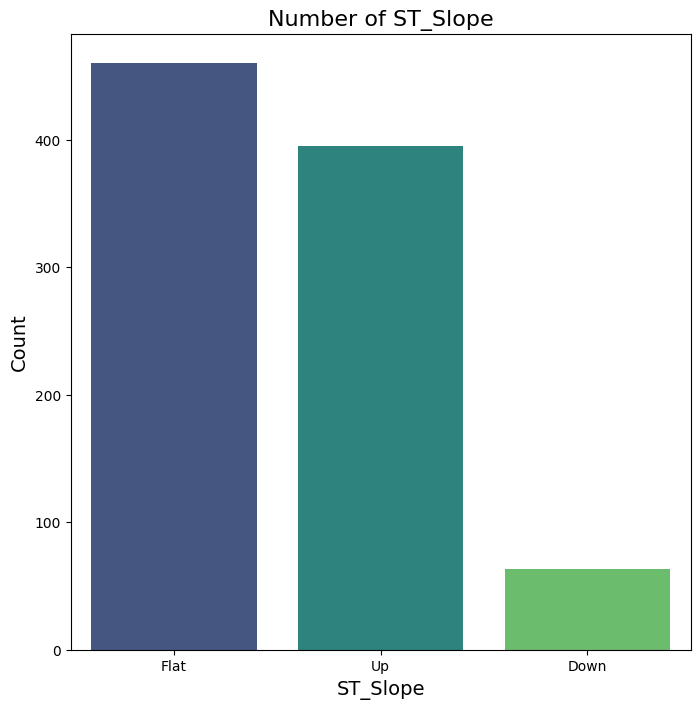

In [18]:
plt.figure(figsize=(8, 8))
sns.barplot(x='ST_Slope', y='count', data=ST_Slope, palette='viridis')
plt.xlabel('ST_Slope', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of ST_Slope', fontsize=16)
plt.show()

In [19]:
HeartDisease = df['HeartDisease'].value_counts().reset_index()
HeartDisease

,HeartDisease,count
0,1,508
1,0,410


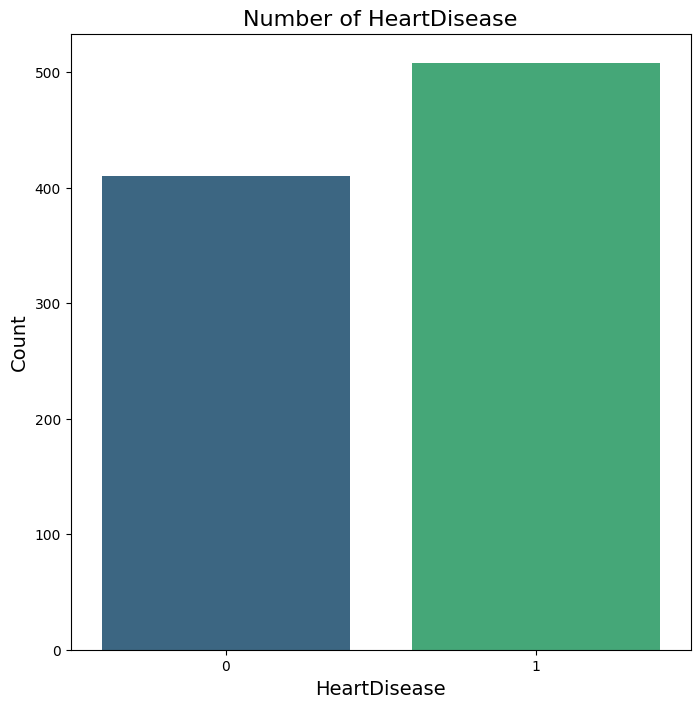

In [20]:
plt.figure(figsize=(8, 8))
sns.barplot(x='HeartDisease', y='count', data=HeartDisease, palette='viridis')
plt.xlabel('HeartDisease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Number of HeartDisease', fontsize=16)
plt.show()

In [21]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [22]:
histogram_labels = ['Age',
                    'RestingBP', 
                    'Cholesterol', 
                    'MaxHR', 
                    'Oldpeak', 
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

# Prepocessing the Data 

In [23]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Column HeartDisease is target Column and will encoder Columns ChestPainType, Sex, RestingBP, ST_Slope, ExerciseAngina**

In [24]:
le = LabelEncoder()

# Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col].astype(str))

In [25]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


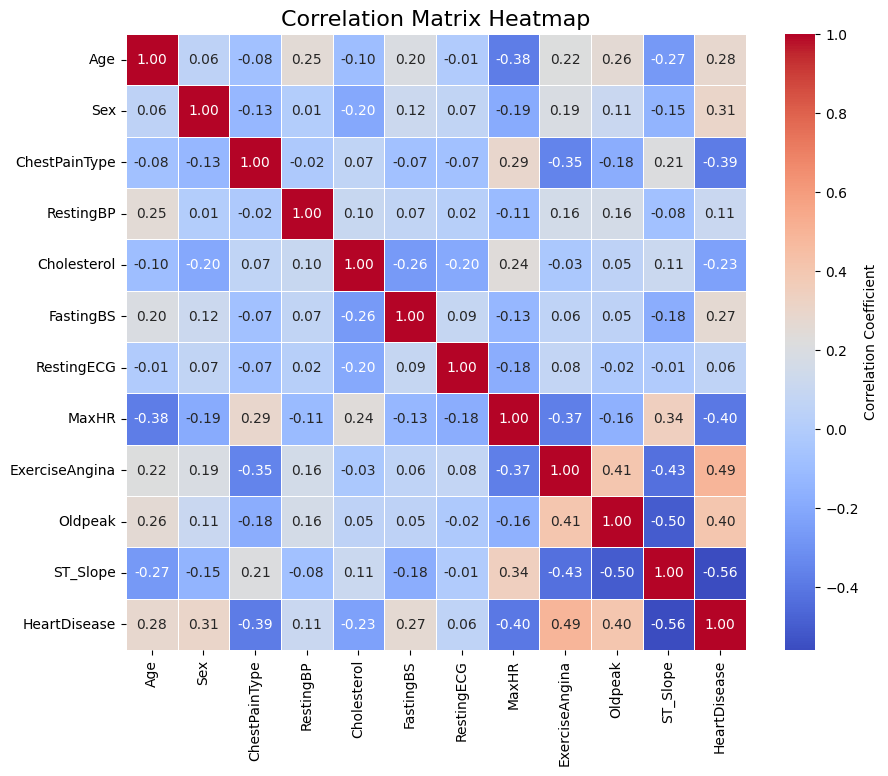

In [26]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [27]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


# Train Test Split

In [28]:
X = df.drop(columns = 'HeartDisease',axis=1)
Y = df['HeartDisease']

In [29]:
X

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [30]:
Y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [31]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [32]:
X_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
214,47,1,0,150,226,0,1,98,1,1.5,1
127,48,0,0,108,163,0,1,175,0,2.0,2
71,44,1,1,130,215,0,1,135,0,0.0,2
439,74,1,2,138,0,0,1,116,0,0.2,2
602,61,1,2,120,337,0,1,98,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
277,52,1,0,170,223,0,1,126,1,1.5,1
817,60,1,0,125,258,0,0,141,1,2.8,1
255,53,0,2,120,274,0,1,130,0,0.0,2
320,59,1,2,125,0,1,1,175,0,2.6,1


In [33]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
391,70,1,0,115,0,0,2,92,1,0.0,1
270,45,1,0,120,225,0,1,140,0,0.0,2
601,61,1,2,140,284,0,1,123,1,1.3,1
244,48,1,0,160,268,0,1,103,1,1.0,1
331,56,1,0,115,0,1,2,82,0,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
392,61,1,0,130,0,0,0,115,0,0.0,1
374,61,1,0,125,0,0,1,105,1,0.0,0
715,44,0,2,108,141,0,1,175,0,0.6,1
904,56,1,1,120,240,0,1,169,0,0.0,0


In [34]:
Y_train

214    1
127    0
71     0
439    0
602    1
      ..
277    1
817    1
255    0
320    1
836    1
Name: HeartDisease, Length: 734, dtype: int64

In [35]:
y_test

391    1
270    0
601    1
244    1
331    1
      ..
392    1
374    1
715    0
904    0
143    0
Name: HeartDisease, Length: 184, dtype: int64

# Building Model

<h2>XGBRegressor<h2>


In [36]:
XGB = XGBClassifier()

In [37]:
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
XGB.score(X_train,Y_train)

1.0

In [39]:
XGB.score(x_test,y_test)

0.842391304347826

In [40]:
y_pred = XGB.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0])

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        81
           1       0.86      0.85      0.86       103

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



<h2>RandomForestClassifier<h2>

In [42]:
RandomForest = RandomForestClassifier(n_estimators=30)

In [43]:
RandomForest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=30)

In [44]:
RandomForest.score(X_train,Y_train)

0.9959128065395095

In [45]:
RandomForest.score(x_test,y_test)

0.8260869565217391

In [46]:
y_pred = RandomForest.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0])

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        81
           1       0.84      0.84      0.84       103

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



<h2>SVM(SVC)<h2>

In [48]:
svc = SVC()

In [49]:
svc.fit(X_train,Y_train)

SVC()

In [50]:
svc.score(X_train,Y_train)

0.7193460490463215

In [51]:
svc.score(x_test,y_test)

0.7282608695652174

In [52]:
y_pred = svc.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0])

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        81
           1       0.78      0.71      0.74       103

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



<h2>DescionTreeClassifier<h2>

In [54]:
DecisionTree = DecisionTreeClassifier()

In [55]:
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier()

In [56]:
DecisionTree.score(X_train,Y_train)

1.0

In [57]:
DecisionTree.score(x_test,y_test)

0.7663043478260869

In [58]:
y_pred = DecisionTree.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74        81
           1       0.79      0.79      0.79       103

    accuracy                           0.77       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.77      0.77       184

